<a href="https://colab.research.google.com/github/cjakuc/DS-Unit-1-Sprint-2-Statistical-Tests-and-Experiments/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# Function that returns prob of drunk given prositive test
def prob_drunk_given_positive(prob_drunk_prior=1/1000,
                             false_positive_rate=0.08,
                             true_positive_rate=1):
  posterior_prob = ((true_positive_rate*prob_drunk_prior)/
                    ((true_positive_rate*prob_drunk_prior)+
                     (false_positive_rate*(1-prob_drunk_prior))))
  return posterior_prob

In [16]:
# Probability that a person is drunk given one positive test
test = prob_drunk_given_positive()
test

0.012357884330202669

In [17]:
# Probability that a person is drunk given two positive tests
test = prob_drunk_given_positive(prob_drunk_prior=test)
test

0.13525210993291495

In [15]:
# How many positive tests are needed to have a probability greater than 95%? ->4
prob = 1/1000
i=0
while(prob<.95):
  prob = prob_drunk_given_positive(prob_drunk_prior=prob)
  i=i+1
i

4

Exploring scipy.stats.bayes_msv

In [0]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None,
                 names=['party','handicapped-infants', 'water-project',
                        'budget', 'physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups', 'anti-satellite-ban',
                        'aid-to-contras', 'mx-missile', 'immigration',
                        'synfuels', 'education', 'right-to-sue', 'crime',
                        'duty-free', 'south-africa'])
import numpy as np
df = df.replace({'?':np.NaN,'n':0,'y':1})

def clean_nans(party,bill):
  # Filter df to only include specified party
  temp = df[df['party']==party]

  # Filter to only include votes on the specified bill and drop NaNs
  temp = temp[bill].dropna()

  return temp

from scipy.stats import t
from scipy import stats

def confidence_interval(party,bill,confidence=0.95,method='frequentist'):
  # Get selected subset of data
  data = clean_nans(party,bill)
  # Confidence interval caluclation and return the mean and lower/upper bounds
  if(method=='bayesian'):
    ci, _, _ = stats.bayes_mvs(data,alpha=confidence)
    ci = [ci[0],ci[1][0],ci[1][1]]
    return ci 
  else:
    n = len(data)
    dof = n - 1
    mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    std_err = stats.sem(data)
    moe = std_err*stats.t.ppf((1+confidence)/2.0,n-1)
    ci = [mean, mean-moe, mean+moe]
    return ci

def ci_plot_bar(bill,confidence=0.95,method='frequentist'):
  CI_dem = confidence_interval('democrat',bill,confidence,method)
  CI_rep = confidence_interval('republican',bill,confidence,method)
  fig, ax = plt.subplots()
  ax.bar(x=0, height=CI_dem[0], yerr=(CI_dem[2]-CI_dem[1]))
  ax.bar(x=1, height=CI_rep[0], yerr=(CI_rep[2]-CI_rep[1]))
  title = ("Percent of Congressmen voting 'Yes' on ",bill)
  ax.set_title(title)
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Democrats', "Republicans"])

In [72]:
# Test conf intervals
test_ci = confidence_interval(party='democrat',
                              bill='physician-fee-freeze',
                              method='frequentist')
print(test_ci)
test_ci = confidence_interval(party='democrat',
                              bill='physician-fee-freeze',
                              method='bayesian')
print(test_ci)

[0.05405405405405406, 0.02633186149720885, 0.08177624661089927]
[0.05405405405405406, 0.02633186149720885, 0.08177624661089927]


In [69]:
testb = clean_nans('democrat','physician-fee-freeze')
testb, _, _ =  stats.bayes_mvs(testb,alpha=0.95)
testb

Mean(statistic=0.05405405405405406, minmax=(0.02633186149720885, 0.08177624661089927))

In [56]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


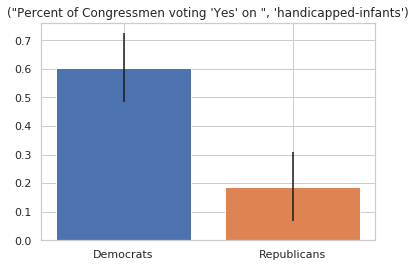

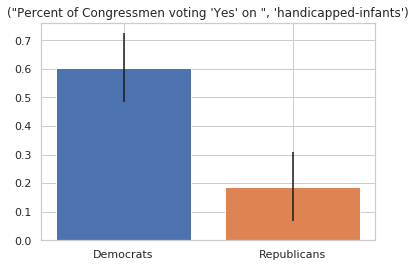

In [57]:
import matplotlib.pyplot as plt
ci_plot_bar(bill='handicapped-infants',method='bayesian')
ci_plot_bar(bill='handicapped-infants',method='frequentist')

The difference between Bayesian and frequentist statistics:

The primary difference between Bayesian and frequentist statistics is that Bayesian statistics takes into account the prior distribution or the expected distribution and not just the sample. In other words, Bayesian descriptions of a sample will factor in prior information that is not included in the sample.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!